In [261]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [119]:
from imblearn.over_sampling import SMOTE

In [35]:
#reading the data file
datasetFileName = '../Downloads/claims.csv'
df = pd.read_csv(datasetFileName)

In [36]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [17]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,4,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,10,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,6,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,4,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [37]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [38]:
categoricalColumns = ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars','BasePolicy']

In [49]:
nonCategoricalColumns = ['Age', 'PolicyNumber', 'RepNumber',
       'Deductible','Year']

In [39]:
for col in categoricalColumns:
    df[col] = df[col].astype('category')

In [40]:
df.dtypes

Month                   category
WeekOfMonth             category
DayOfWeek               category
Make                    category
AccidentArea            category
DayOfWeekClaimed        category
MonthClaimed            category
WeekOfMonthClaimed      category
Sex                     category
MaritalStatus           category
Age                        int64
Fault                   category
PolicyType              category
VehicleCategory         category
VehiclePrice            category
FraudFound_P               int64
PolicyNumber               int64
RepNumber                  int64
Deductible                 int64
DriverRating            category
Days_Policy_Accident    category
Days_Policy_Claim       category
PastNumberOfClaims      category
AgeOfVehicle            category
AgeOfPolicyHolder       category
PoliceReportFiled       category
WitnessPresent          category
AgentType               category
NumberOfSuppliments     category
AddressChange_Claim     category
NumberOfCa

In [41]:
# replacing categorical variables value with the integer code
df[categoricalColumns] = df[categoricalColumns].apply(lambda x: x.cat.codes)

In [42]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,4,6,6,1,6,5,0,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,2,6,6,1,2,5,3,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,4,0,6,1,5,10,1,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,1,2,17,0,1,6,0,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,4,1,6,1,6,4,1,0,2,...,3,4,0,0,0,3,3,0,1994,1


In [43]:
df.columns[15]

'FraudFound_P'

In [101]:
labels = numpy.array(df['FraudFound_P'])
features = numpy.array(df[categoricalColumns + nonCategoricalColumns])

In [51]:
# applying one hot encoding
ohe = OneHotEncoder(categorical_features=range(len(categoricalColumns)))
ohe.fit(features)

OneHotEncoder(categorical_features=range(0, 27),
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values='auto', sparse=True)

In [52]:
ohe.n_values_

array([12,  5,  7, 19,  2,  8, 13,  5,  2,  4,  2,  9,  3,  6,  4,  5,  4,
        4,  8,  9,  2,  2,  2,  4,  5,  5,  3])

In [56]:
# new features
transformedFeatures = ohe.transform(features).toarray()

In [230]:
numpy.savetxt('modifiedTraining.csv', transformedFeatures, delimiter=',')

In [231]:
numpy.savetxt('labels.csv', labels, delimiter=',')

splitting dataset into training set and test set

In [233]:
data = numpy.concatenate((transformedFeatures,labels.reshape(-1,1)), axis=1)

In [236]:
training, test = train_test_split(data, test_size=0.3, random_state=1)

In [235]:
# using SMOTE for over-sampling
sm = SMOTE(kind='regular')

In [238]:
x = training[:,:-1]
y = training[:,-1]

In [239]:
trainingX, trainingY = sm.fit_sample(x, y)

In [241]:
print('Number of fraudulent cases = {}\nNumber of true cases = {}'.format(sum(trainingY[:] == 1), sum(trainingY[:] == 0)))

Number of fraudulent cases = 10180
Number of true cases = 10180


In [242]:
testX = test[:, :-1]
testY = test[:,-1]

In [243]:
# normalizing training data to zero mean and unit standard deviation
trainingX -= numpy.mean(trainingX, axis=0)
sd = numpy.std(trainingX, axis=0)
sd[sd[:] == 0] = 1
trainingX /= sd

In [244]:
ohe1 = OneHotEncoder()
ohe1.fit(trainingY.reshape(-1,1))
transformedTrainingY = ohe1.transform(trainingY.reshape(-1,1)).toarray()

# Using keras to train neural network with 1 hidden layer containing 80 nodes

In [220]:
model = Sequential()

In [221]:
model.add(Dense(80, activation='relu', input_shape=(159,)))
model.add(Dense(2, activation='softmax'))

In [222]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [245]:
model.fit(trainingX, transformedTrainingY, batch_size = 64, epochs=10, verbose=2)

Epoch 1/10
 - 1s - loss: 0.0414 - acc: 0.9910
Epoch 2/10
 - 1s - loss: 0.0281 - acc: 0.9943
Epoch 3/10
 - 1s - loss: 0.0174 - acc: 0.9980
Epoch 4/10
 - 1s - loss: 0.0133 - acc: 0.9991
Epoch 5/10
 - 1s - loss: 0.0104 - acc: 0.9996
Epoch 6/10
 - 1s - loss: 0.0085 - acc: 0.9997
Epoch 7/10
 - 1s - loss: 0.0066 - acc: 1.0000
Epoch 8/10
 - 1s - loss: 0.0055 - acc: 0.9999
Epoch 9/10
 - 1s - loss: 0.0046 - acc: 1.0000
Epoch 10/10
 - 1s - loss: 0.0038 - acc: 1.0000


In [246]:
testX -= numpy.mean(testX, axis=0)
sd = numpy.std(testX, axis=0)
sd[sd[:] == 0] = 1
testX /= sd

In [247]:
loss, accuracy = model.evaluate(testX, ohe1.transform(testY.reshape(-1,1)).toarray())

4626/4626 [==============================] - 0s 41us/step


In [248]:
print('Test Loss = {} , Test Accuracy = {}'.format(loss, accuracy))

Test Loss = 0.2440140203295386 , Test Accuracy = 0.9111543449034074


In [254]:
predicted = model.predict_classes(testX)

In [262]:
predictedProb = model.predict(testX)

In [274]:
fpr, tpr, thresholds = roc_curve(testY, predictedProb[:,1])

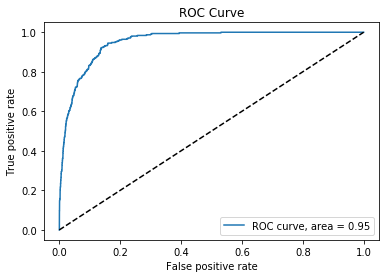

In [275]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve, area = {:.2}'.format(auc(fpr, tpr)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [265]:
help(roc_curve)

Help on function roc_curve in module sklearn.metrics.ranking:

roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
    Compute Receiver operating characteristic (ROC)
    
    Note: this implementation is restricted to the binary classification task.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    
    y_true : array, shape = [n_samples]
        True binary labels in range {0, 1} or {-1, 1}.  If labels are not
        binary, pos_label should be explicitly given.
    
    y_score : array, shape = [n_samples]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    pos_label : int or str, default=None
        Label considered as positive and others are considered negative.
    
    sample_weight : array-like of shape = [n_samples], optiona

In [257]:
confusion_matrix(testY, predicted)

array([[3973,  344],
       [  67,  242]])

There are 344 false positives in test set. (Needs improvement)

# Training Using logistic regression

In [113]:
from sklearn.linear_model import LogisticRegression

In [228]:
logit = LogisticRegression()
logit.fit(trainingX, trainingY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [229]:
logit.score(testX,testY)

0.7770305225038799